Welcome to Makeup and Skincare Finder!
Would you like to search makeup or skincare products? makeup
Enter a makeup brand: colourpop
Enter a product type: lip_liner
Enter the type of category: pencil
colourpop Lippie Pencil 
 Description: Lippie Pencil A long-wearing and high-intensity lip pencil that glides on easily and prevents feathering. Many of our Lippie Stix have a coordinating Lippie Pencil designed to compliment it perfectly, but feel free to mix and match! 
 Safety Information: ['Vegan', 'cruelty free'] 
 Link to buy: https://colourpop.com/collections/lippie-pencil


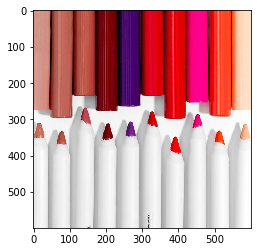

In [136]:
!pip install -q requests
!pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
import json
import pandas as pd
import requests

makeup_url = 'https://makeup-api.herokuapp.com/api/v1/products.json'
#skincare_url = 'https://skincare-api.herokuapp.com/products.json'
makeup_products = pd.read_json(makeup_url)
#skincare_products = pd.read_json(skincare_url)
try:
    print("Welcome to Makeup and Skincare Finder!")
    makeup_or_skincare = input("Would you like to search makeup or skincare products? ")
    if makeup_or_skincare == 'makeup':
        input_brand = input("Enter a makeup brand: ") 
        input_product_type = input("Enter a product type: ")  
        input_category = input("Enter the type of category: ")   
        params = {'brand' : input_brand, 'product_type' : input_product_type, 'category': input_category}
        makeup_response = requests.get('https://makeup-api.herokuapp.com/api/v1/products.json', params=params)
        your_product = makeup_response.json()
        brand = your_product[0]['brand']
        name = your_product[0]['name']
        description = your_product[0]['description']
        product_link = your_product[0]['product_link']
        tags = your_product[0]['tag_list']
        image_link = your_product[0]['image_link']
        print( brand, name,'\n Description:', description,'\n Safety Information:', tags,'\n Link to buy:',product_link)
        response = requests.get(image_link, stream=True)
        img = Image.open(response.raw)
        plt.imshow(img)
        plt.show()  
    else:
        print("Error in input, please check spelling of 'makeup' or 'skincare'")
except requests.exceptions.RequestException as e:
    print("ERROR: Cannot connect to ", makeup_url)
    print("DETAILS:", e)
except requests.exceptions.HTTPError as e:
    print("ERROR: Response from ", makeup_url, 'was not ok.')
    print("DETAILS:", e)

    
        